# Lezione di laboratorio 4
In questa lezione abbiamo utilizzato un codice basato sull'algoritmo di Verlet per calcolare alcune proprietà macroscopiche nell'ambito di dinamica molecolare. <br>
Si è fatto uso del concetto di periodic boundary conditions (PBC). <br><br>
<i>Richiami teorici: </i> <br>
L'algoritmo di Verlet si ottiene per espansione di Taylor al terzo ordine di $r(t+dt)$ e $r(t-dt)$.
Il risultato è:<br>
$r(t+dt)= 2r(t)-r(t-dt)+dt a^2(t)$ <br><br>
L'accelerazione delle particelle dipende dal potenziale utilizzato ($F=ma=-\nabla V$), in questo caso uno di tipo Lennard-Jones: <br><br>
$$V_{LJ}=4\epsilon[(\frac{\sigma}{r})^12-\frac{\sigma}{r})^6]$$
Il potenziale è calcolato rispetto a tutte le coppie di particelle, facendo uso di PBC (al fine di ridurre il numero di particelle coinvolte nella simulaizone e quindi "alleggerirla") e di un raggio di cut-off (una distanza di troncamento oltre cui questo potenziale è considerato nullo.
Inoltre le simulazioni sono svolte in unità di Lennard-Jones, rendendo possibile moltiplicando i risultati per costanti fisiche diverse, adattare le simulazioni a particelle diverse.

### Esercizio 4.1
E' stato implementata nel codice la possibilità di far ripartire una simulazione lanciata precedentemente. <br>
Vengono caricate le posizioni all'ultimo e penultimo step della simulaione precedente ( $r(t)$ e $r(t-dt)$) delle particelle. <br>
Viene calcolato lo step successivo $r(t+dt)$, e utilizzato per calcolare le velocità delle particelle.
Tramite queste si può calcolare la temperatura, che confrontata con quella desiderata può essere utilizzata per calcolare un fattore di scaling delle velocità. <br>
Una volta riscalate le velocità si calcola un nuovo valore di $r(t)$, che con $r(t+dt)$ calcolato come sopra indicato permetterà di far ripartire la simulazione.


### Esercizio 4.2
Viene implementata una divisione in blocchi della simulazione e il calcolo dei valori medi per particella di energia, energia potenziale, energia cinetica e temperatura (con relative incertezze).

### Esercizio 4.3
Viene implementato il calcolo della pressione data dalle particelle; la formula per il calcolo della pressione in un sistema Lennard-Jones proviene dal teorema del viriale.<br>
$ P = \rho k_B T + \frac{\langle W \rangle}{3V} $ con $W=\frac{1}{3}\sum_i r_i \cdot f_i$

### Esercizio 4.4
Il codice di dinamica molecolare con le modifiche apportate viene poi utilizzato per fare simulazioni di fase solida, liquida e gassosa di Argon e Krypton.
I parametri utilizzati sono:
<a>
1. fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (raggio di cut-off: $r_c = 2.2$)
2. fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (raggio di cut-off: $r_c = 2.5$)
3. fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (raggio di cut-off: $r_c = 5.0$)  
</a>
I risultati sono poi riportati in unità SI, con a sinistra i risultati per l'Argon e a destra quelli per il Kripton. <br>
Fase solida (tutti i grafici sono in funzione del numero di blocchi):

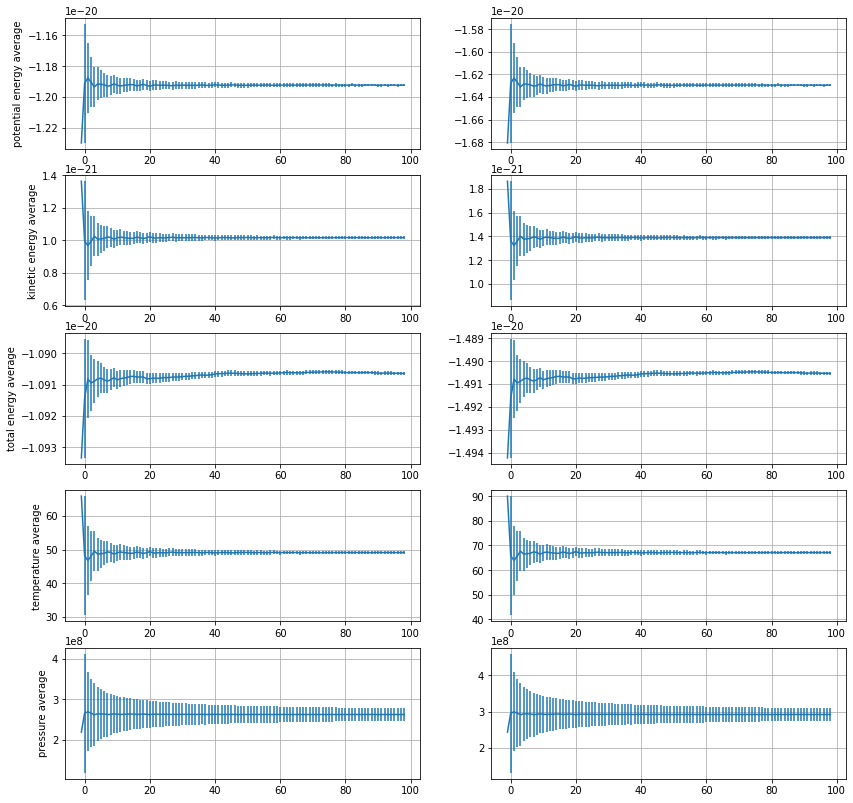

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
ea = 120
sa = 0.34e-9
ma = 39.948*1.66054e-27
kb = 1.38065e-23
ek = 164
sk = 0.364e-9
mk = 39.948*1.66054e-27
a1,a2,a3 = np.loadtxt("solid/ave_epot.dat", usecols=(0,1,2), unpack=True)
b1,b2,b3 = np.loadtxt("solid/ave_ekin.dat", usecols=(0,1,2), unpack=True)
c1,c2,c3 = np.loadtxt("solid/ave_etot.dat", usecols=(0,1,2), unpack=True)
d1,d2,d3 = np.loadtxt("solid/ave_temp.dat", usecols=(0,1,2), unpack=True)
e1,e2,e3= np.loadtxt("solid/ave_pres.dat", usecols=(0,1,2), unpack=True)
plt.figure(figsize=(14, 14))
plt.subplot(5,2,1)
plt.errorbar(a1, a2*(ea*kb), yerr=a3*(ea*kb))
plt.grid(True)
plt.ylabel("potential energy average")
plt.subplot(5,2,3)
plt.errorbar(b1, b2*(ea*kb), yerr=b3*(ea*kb))
plt.grid(True)
plt.ylabel("kinetic energy average")
plt.subplot(5,2,5)
plt.errorbar(c1, c2*(ea*kb), yerr=c3*(ea*kb))
plt.grid(True)
plt.ylabel("total energy average")
plt.subplot(5,2,7)
plt.errorbar(d1, d2*ea, yerr=d3*ea)
plt.grid(True)
plt.ylabel("temperature average")
plt.subplot(5,2,9)
plt.errorbar(e1, e2*(ea*kb/(sa**3)), yerr=e3*(ea*kb/(sa**3)))
plt.grid(True)
plt.ylabel("pressure average")
plt.subplot(5,2,2)
plt.errorbar(a1, a2*(ek*kb), yerr=a3*(ek*kb))
plt.grid(True)
plt.subplot(5,2,4)
plt.errorbar(b1, b2*(ek*kb), yerr=b3*(ek*kb))
plt.grid(True)
plt.subplot(5,2,6)
plt.errorbar(c1, c2*(ek*kb), yerr=c3*(ek*kb))
plt.grid(True)
plt.subplot(5,2,8)
plt.errorbar(d1, d2*ek, yerr=d3*ek)
plt.grid(True)
plt.subplot(5,2,10)
plt.errorbar(e1, e2*(ek*kb/(sk**3)), yerr=e3*(ek*kb/(sk**3)))
plt.grid(True)
plt.show()

Fase liquida

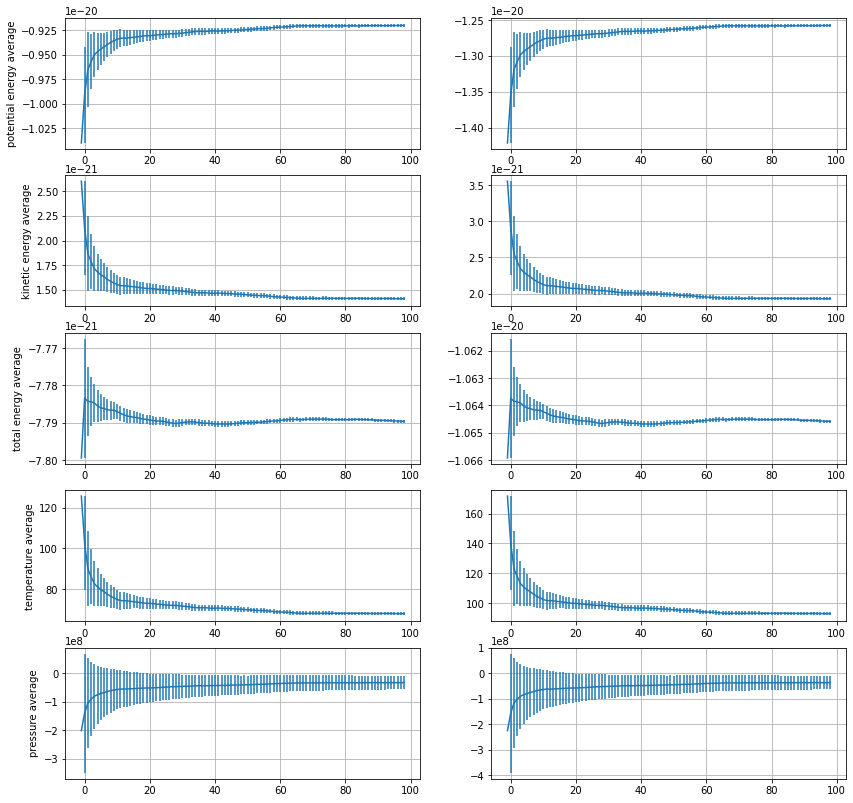

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
ea = 120
sa = 0.34e-9
ma = 39.948*1.66054e-27
kb = 1.38065e-23
ek = 164
sk = 0.364e-9
mk = 39.948*1.66054e-27
a1,a2,a3 = np.loadtxt("liquid/ave_epot.dat", usecols=(0,1,2), unpack=True)
b1,b2,b3 = np.loadtxt("liquid/ave_ekin.dat", usecols=(0,1,2), unpack=True)
c1,c2,c3 = np.loadtxt("liquid/ave_etot.dat", usecols=(0,1,2), unpack=True)
d1,d2,d3 = np.loadtxt("liquid/ave_temp.dat", usecols=(0,1,2), unpack=True)
e1,e2,e3= np.loadtxt("liquid/ave_pres.dat", usecols=(0,1,2), unpack=True)
plt.figure(figsize=(14, 14))
plt.subplot(5,2,1)
plt.errorbar(a1, a2*(ea*kb), yerr=a3*(ea*kb))
plt.grid(True)
plt.ylabel("potential energy average")
plt.subplot(5,2,3)
plt.errorbar(b1, b2*(ea*kb), yerr=b3*(ea*kb))
plt.grid(True)
plt.ylabel("kinetic energy average")
plt.subplot(5,2,5)
plt.errorbar(c1, c2*(ea*kb), yerr=c3*(ea*kb))
plt.grid(True)
plt.ylabel("total energy average")
plt.subplot(5,2,7)
plt.errorbar(d1, d2*ea, yerr=d3*ea)
plt.grid(True)
plt.ylabel("temperature average")
plt.subplot(5,2,9)
plt.errorbar(e1, e2*(ea*kb/(sa**3)), yerr=e3*(ea*kb/(sa**3)))
plt.grid(True)
plt.ylabel("pressure average")
plt.subplot(5,2,2)
plt.errorbar(a1, a2*(ek*kb), yerr=a3*(ek*kb))
plt.grid(True)
plt.subplot(5,2,4)
plt.errorbar(b1, b2*(ek*kb), yerr=b3*(ek*kb))
plt.grid(True)
plt.subplot(5,2,6)
plt.errorbar(c1, c2*(ek*kb), yerr=c3*(ek*kb))
plt.grid(True)
plt.subplot(5,2,8)
plt.errorbar(d1, d2*ek, yerr=d3*ek)
plt.grid(True)
plt.subplot(5,2,10)
plt.errorbar(e1, e2*(ek*kb/(sk**3)), yerr=e3*(ek*kb/(sk**3)))
plt.grid(True)
plt.show()

Fase gassosa

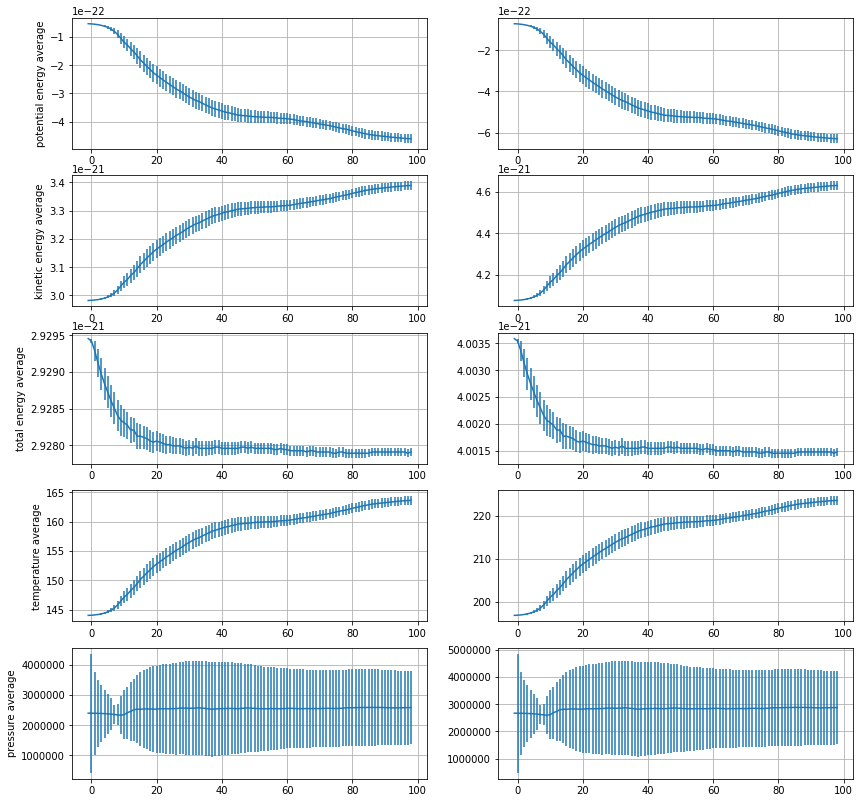

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
ea = 120
sa = 0.34e-9
ma = 39.948*1.66054e-27
kb = 1.38065e-23
ek = 164
sk = 0.364e-9
mk = 39.948*1.66054e-27
a1,a2,a3 = np.loadtxt("gas/ave_epot.dat", usecols=(0,1,2), unpack=True)
b1,b2,b3 = np.loadtxt("gas/ave_ekin.dat", usecols=(0,1,2), unpack=True)
c1,c2,c3 = np.loadtxt("gas/ave_etot.dat", usecols=(0,1,2), unpack=True)
d1,d2,d3 = np.loadtxt("gas/ave_temp.dat", usecols=(0,1,2), unpack=True)
e1,e2,e3= np.loadtxt("gas/ave_pres.dat", usecols=(0,1,2), unpack=True)
plt.figure(figsize=(14, 14))
plt.subplot(5,2,1)
plt.errorbar(a1, a2*(ea*kb), yerr=a3*(ea*kb))
plt.grid(True)
plt.ylabel("potential energy average")
plt.subplot(5,2,3)
plt.errorbar(b1, b2*(ea*kb), yerr=b3*(ea*kb))
plt.grid(True)
plt.ylabel("kinetic energy average")
plt.subplot(5,2,5)
plt.errorbar(c1, c2*(ea*kb), yerr=c3*(ea*kb))
plt.grid(True)
plt.ylabel("total energy average")
plt.subplot(5,2,7)
plt.errorbar(d1, d2*ea, yerr=d3*ea)
plt.grid(True)
plt.ylabel("temperature average")
plt.subplot(5,2,9)
plt.errorbar(e1, e2*(ea*kb/(sa**3)), yerr=e3*(ea*kb/(sa**3)))
plt.grid(True)
plt.ylabel("pressure average")
plt.subplot(5,2,2)
plt.errorbar(a1, a2*(ek*kb), yerr=a3*(ek*kb))
plt.grid(True)
plt.subplot(5,2,4)
plt.errorbar(b1, b2*(ek*kb), yerr=b3*(ek*kb))
plt.grid(True)
plt.subplot(5,2,6)
plt.errorbar(c1, c2*(ek*kb), yerr=c3*(ek*kb))
plt.grid(True)
plt.subplot(5,2,8)
plt.errorbar(d1, d2*ek, yerr=d3*ek)
plt.grid(True)
plt.subplot(5,2,10)
plt.errorbar(e1, e2*(ek*kb/(sk**3)), yerr=e3*(ek*kb/(sk**3)))
plt.grid(True)
plt.show()